In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

https://www.naics.com/naics-code-description/?code=332322

https://data.bls.gov/timeseries/WPU1073?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true

In [117]:
df = pd.read_csv('RawData/32621_Tire manufacturing_Monthly.csv')

In [118]:
df.head()

,Series ID,Year,Period,Label,Value
0,EIUIZ32621,2005,M12,2005 Dec,100.0
1,EIUIZ32621,2006,M01,2006 Jan,100.3
2,EIUIZ32621,2006,M02,2006 Feb,100.4
3,EIUIZ32621,2006,M03,2006 Mar,101.4
4,EIUIZ32621,2006,M04,2006 Apr,102.2


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series ID  210 non-null    object 
 1   Year       210 non-null    int64  
 2   Period     210 non-null    object 
 3   Label      210 non-null    object 
 4   Value      210 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [120]:
df_new = df[['Label','Value']]
df_new['Date'] = df['Label']
df_new['Price'] = df['Value']
df_new = df_new.drop(['Label','Value'],axis=1)

In [121]:
df_new.head()

,Date,Price
0,2005 Dec,100.0
1,2006 Jan,100.3
2,2006 Feb,100.4
3,2006 Mar,101.4
4,2006 Apr,102.2


In [122]:
df_new['Date']= pd.to_datetime(df_new['Date'])
df_new =  df_new.set_index(df_new['Date'])
df_new.drop('Date', axis=1 , inplace=True)
df_new.head()

,Price
Date,
2005-12-01,100.0
2006-01-01,100.3
2006-02-01,100.4
2006-03-01,101.4
2006-04-01,102.2


In [123]:
# df_new.to_csv('Tire_manufacturing.csv', index=True)

<Axes: xlabel='Date'>

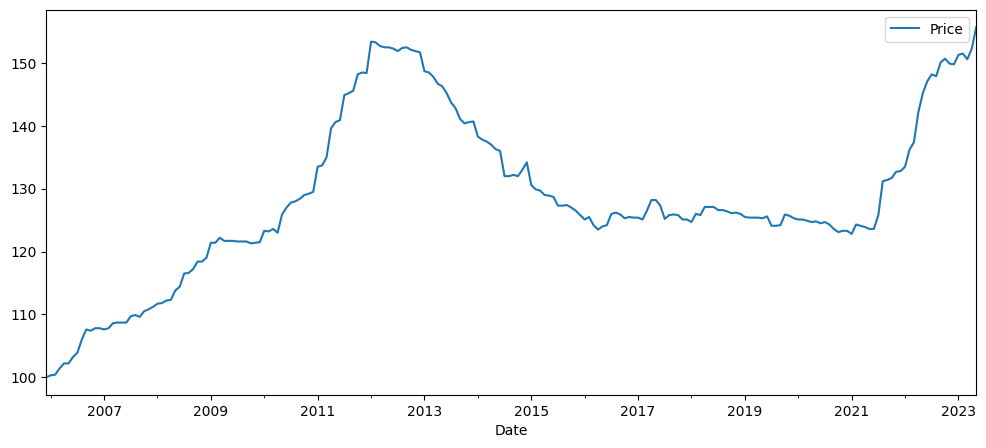

In [11]:
df_new.plot(figsize=(12,5))

## Data Cleaning

In [12]:
df_new.isnull().sum()

Price    0
dtype: int64

In [13]:
# df.dropna(inplace = True)
# df.reset_index(drop=False,inplace=True)

In [14]:
df_new.shape

(210, 1)

In [15]:
df_new.dtypes

Price    float64
dtype: object

In [16]:
df_new = df_new.sort_values('Date', ascending=True)

In [17]:
df_new.head()

,Price
Date,
2005-12-01,100.0
2006-01-01,100.3
2006-02-01,100.4
2006-03-01,101.4
2006-04-01,102.2


In [18]:
df_new.isnull().sum()

Price    0
dtype: int64

In [19]:
df_new.dropna(inplace = True)
df_new.reset_index(drop=False,inplace=True)

In [20]:
df_new.head()

,Date,Price
0,2005-12-01,100.0
1,2006-01-01,100.3
2,2006-02-01,100.4
3,2006-03-01,101.4
4,2006-04-01,102.2


In [21]:
df_new =  df_new.set_index(df_new['Date'])
df_new.drop('Date', axis=1 , inplace=True)
df_new.head()

,Price
Date,
2005-12-01,100.0
2006-01-01,100.3
2006-02-01,100.4
2006-03-01,101.4
2006-04-01,102.2


In [22]:
df_new = df_new.iloc[86:]

In [23]:
df_new.shape

(124, 1)

<Axes: xlabel='Date', ylabel='Price'>

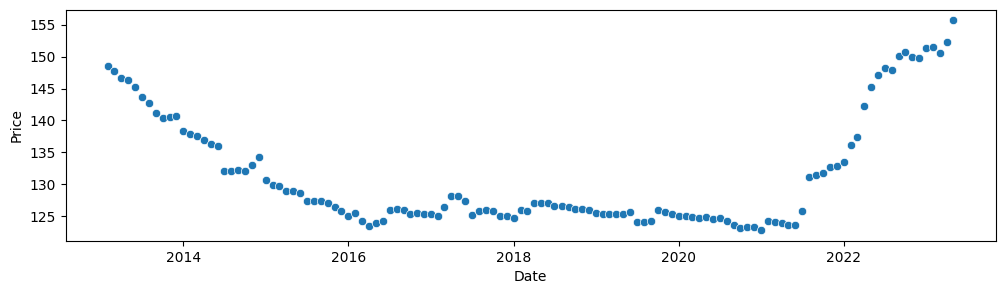

In [24]:
plt.figure(figsize=(12,3))

sns.scatterplot(x=df_new.index, y=df_new['Price'])

<Axes: >

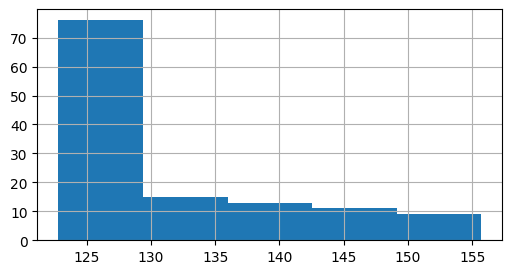

In [25]:
plt.figure(figsize=(6,3))

df_new['Price'].hist(bins=5)

<Axes: >

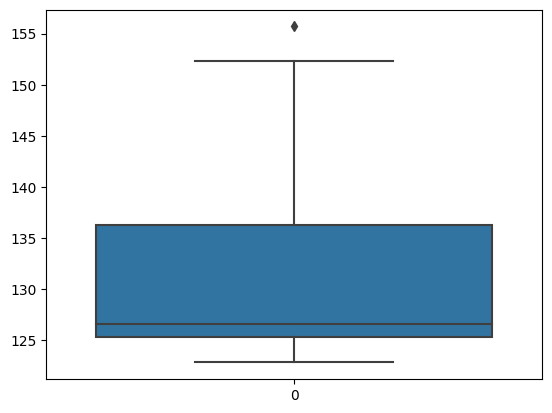

In [26]:
sns.boxplot(df_new['Price'])

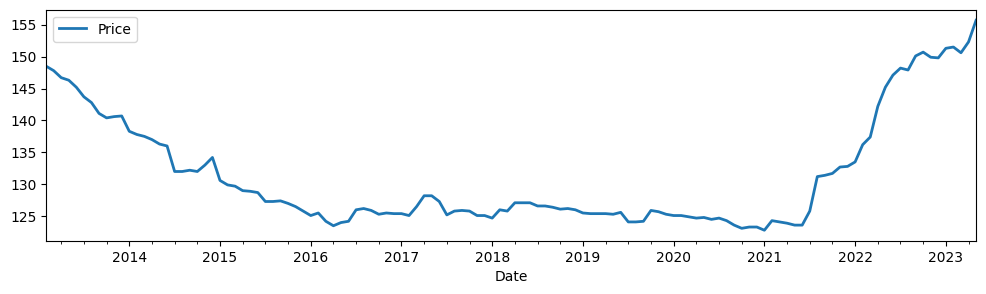

In [27]:
df_new.plot.line(y='Price',figsize=(12,3),lw=2);

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Price'>

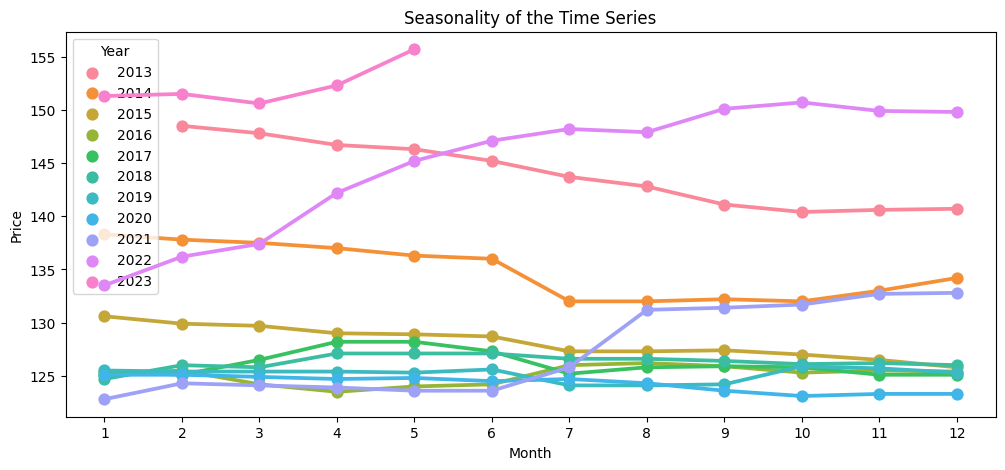

In [28]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df_new.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(12,5))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Price',hue='Year',data=df_temp)

https://www.metafab.com/steel-prices-growth-in-metal-fabrication/

In [29]:
df_pre = df_new[:'2020-03-1']
df_pandemic = df_new['2020-03-1':'2022-01-01']
df_post = df_new['2022-01-01':]

<Axes: xlabel='Date'>

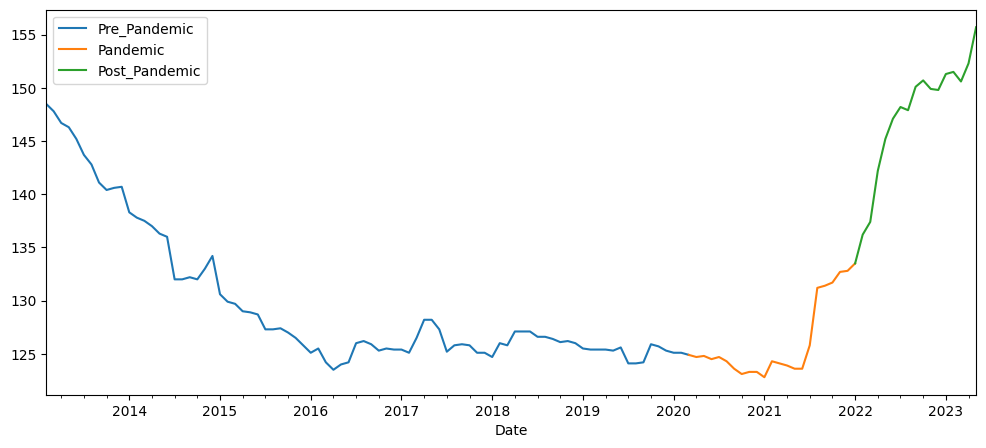

In [30]:
df_pre['Price'].plot(legend=True, label='Pre_Pandemic',figsize=(12,5))
df_pandemic['Price'].plot(legend=True, label='Pandemic')
df_post['Price'].plot(legend=True, label = 'Post_Pandemic')

## Decomposition of Time Series

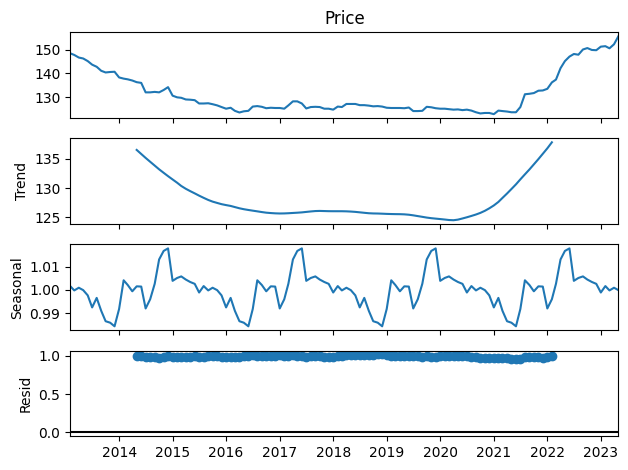

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_new['Price'], model='multiplicative',period=30)  # model='mul' also works
result.plot();

## Simple Moving Average (SMA)

In [32]:
df_new['12-month-SMA'] = df_new['Price'].rolling(window=12).mean()

<Axes: xlabel='Date'>

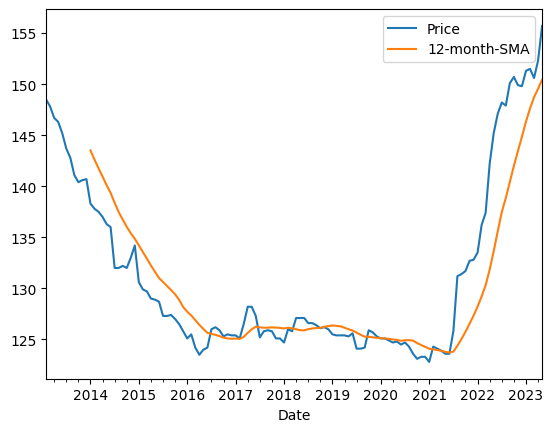

In [33]:
df_new[['Price','12-month-SMA']].plot()

## Exponentially Weighted Moving Average (EWMA)

In [34]:
df_new['EWMA12'] = df_new['Price'].ewm(span=12,adjust=False).mean()

<Axes: xlabel='Date'>

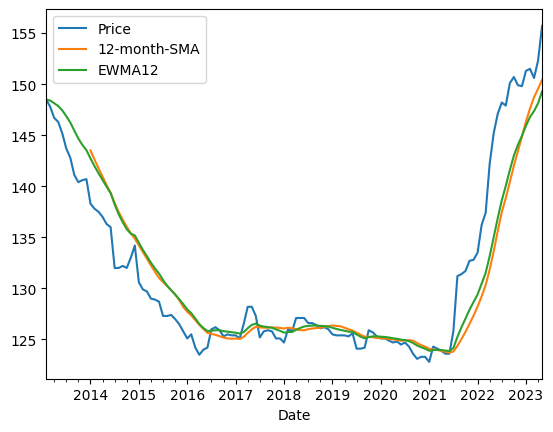

In [35]:
df_new[['Price','12-month-SMA','EWMA12']].plot()

## Comparing SMA to EWMA

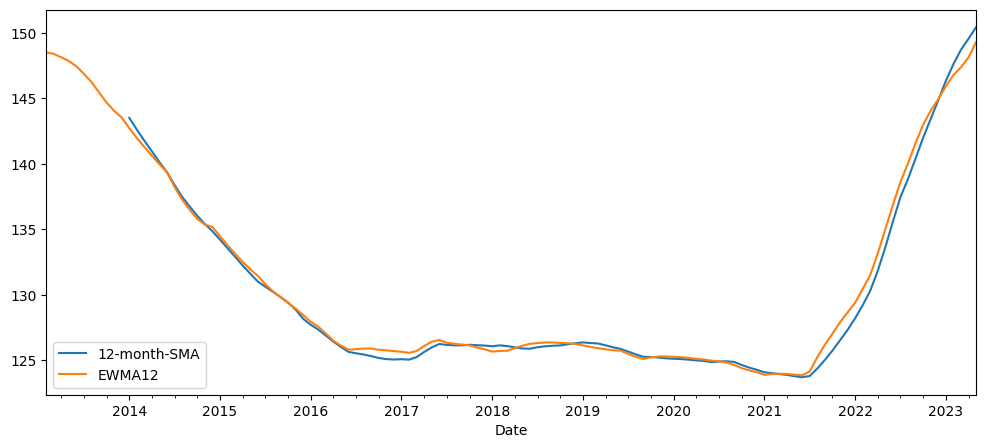

In [36]:
df_new[['12-month-SMA','EWMA12']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be

## Check for Stationarity

### Augmented Dickey Fuller (ADF) Test 

#### p-value > 0.05: non-stationary.
#### p-value <= 0.05: stationary.
#### Test statistics: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

In [37]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Month')
    plt.ylabel('Item_Price')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

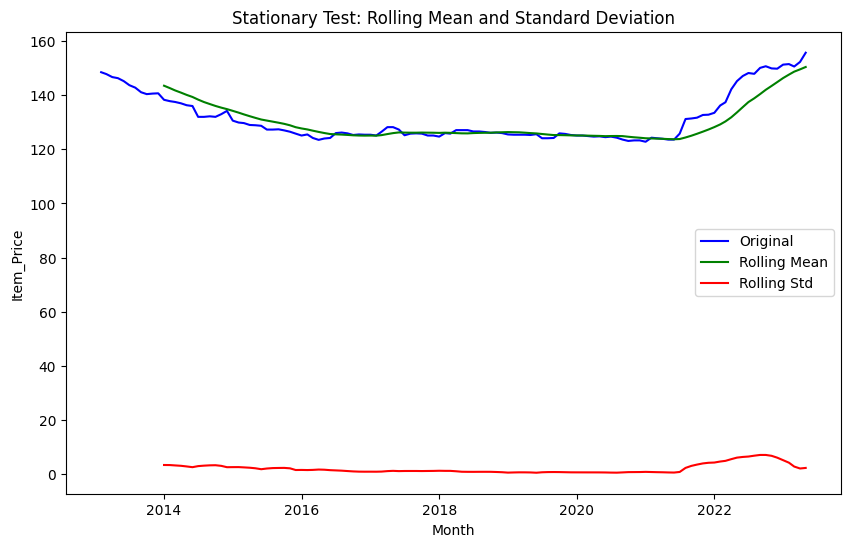

Results of Dickey-Fuller Test
Test Statistic                  -0.500206
p-value                          0.891976
#Lags Used                       8.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [38]:
stationarity_test(df_new['Price'])

### Differencing

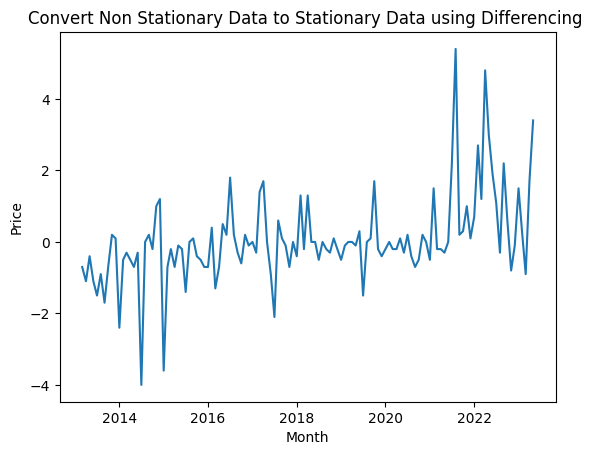

In [39]:
df_diff = df_new['Price'].diff(periods = 1) # First order differencing
plt.xlabel('Month')
plt.ylabel('Price')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

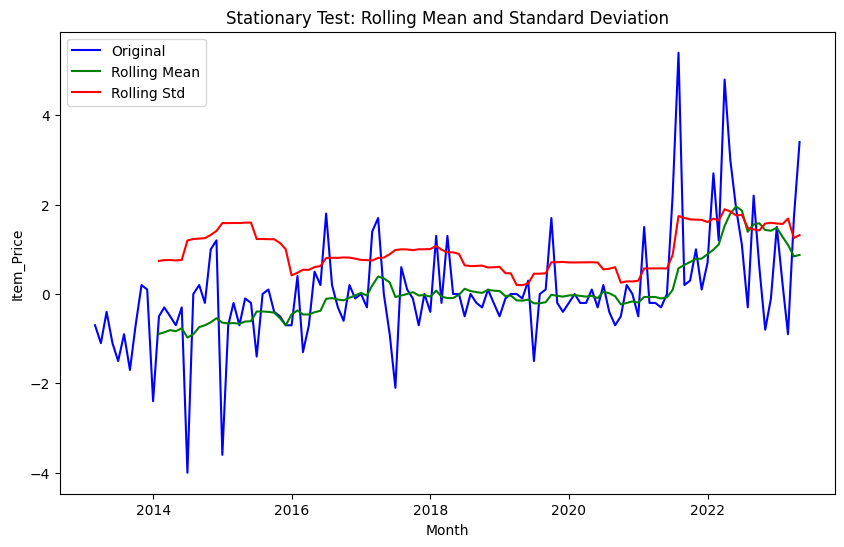

Results of Dickey-Fuller Test
Test Statistic                  -1.901729
p-value                          0.331248
#Lags Used                       7.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [40]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

### Transformation

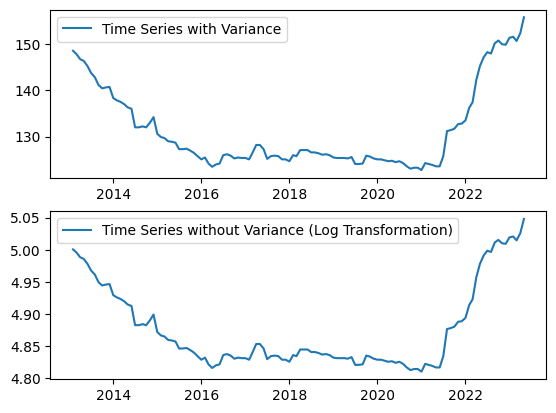

In [41]:
df_log = np.log(df_new['Price'])

plt.subplot(211)
plt.plot(df_new['Price'], label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

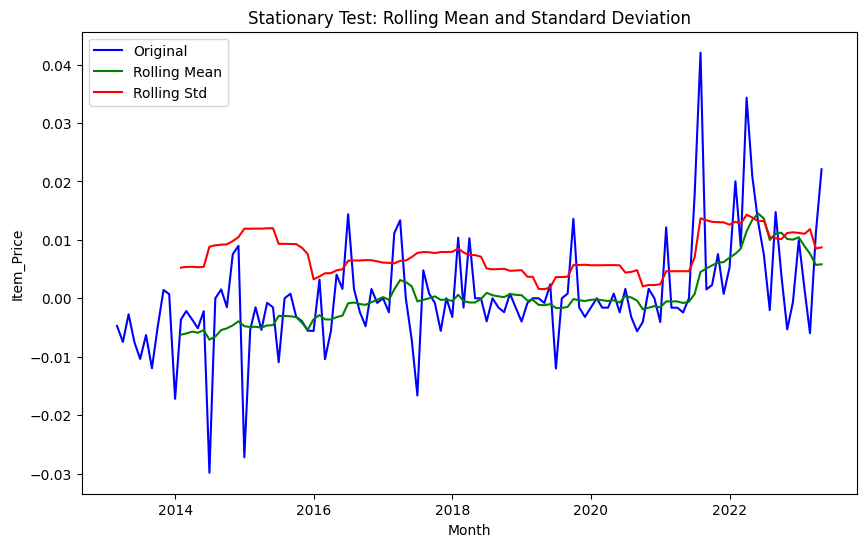

Results of Dickey-Fuller Test
Test Statistic                  -1.953977
p-value                          0.307110
#Lags Used                       7.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [42]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values

stationarity_test(df_log_diff)

In [43]:
df_new.index.freq = 'MS'

df_new.head()

,Price,12-month-SMA,EWMA12
Date,,,
2013-02-01,148.5,NaN,148.500000
2013-03-01,147.8,NaN,148.392308
2013-04-01,146.7,NaN,148.131953
2013-05-01,146.3,NaN,147.850114
2013-06-01,145.2,NaN,147.442404


In [44]:
df_new= df_new.drop(['12-month-SMA','EWMA12'],axis=1)

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2013-02-01 to 2023-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   124 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [46]:
# df_new['Price'].plot(figsize=(10,5))

## Forecasting with the Holt-Winters Method

### Train Test Split

In [47]:
train_data = df_new.iloc[:112] # Goes up to but not including 101
test_data = df_new.iloc[112:]

### Fitting the Model

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

### Evaluating Model against Test Set

In [49]:
test_predictions = fitted_model.forecast(12).rename('HW Forecast')

In [50]:
test_predictions

2022-06-01    147.051085
2022-07-01    148.278850
2022-08-01    151.028451
2022-09-01    152.851777
2022-10-01    154.861486
2022-11-01    157.171762
2022-12-01    159.308037
2023-01-01    160.334340
2023-02-01    163.035849
2023-03-01    165.212438
2023-04-01    168.031639
2023-05-01    170.546321
Freq: MS, Name: HW Forecast, dtype: float64

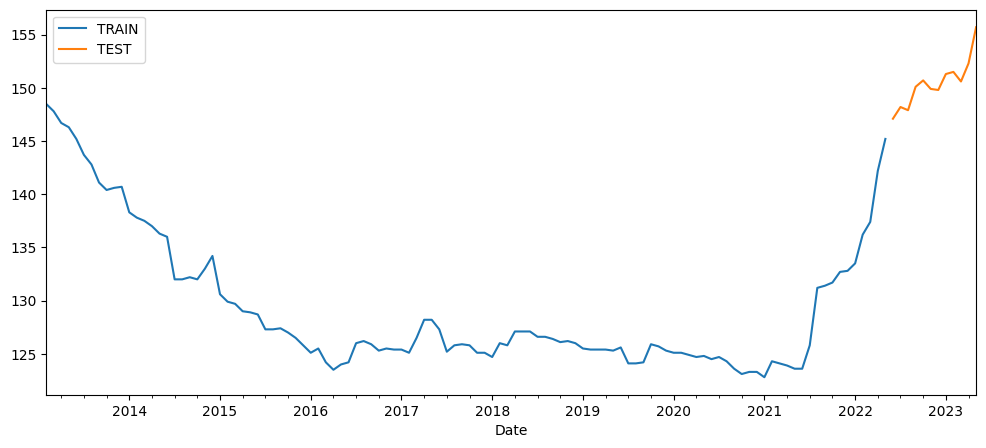

In [51]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,5));

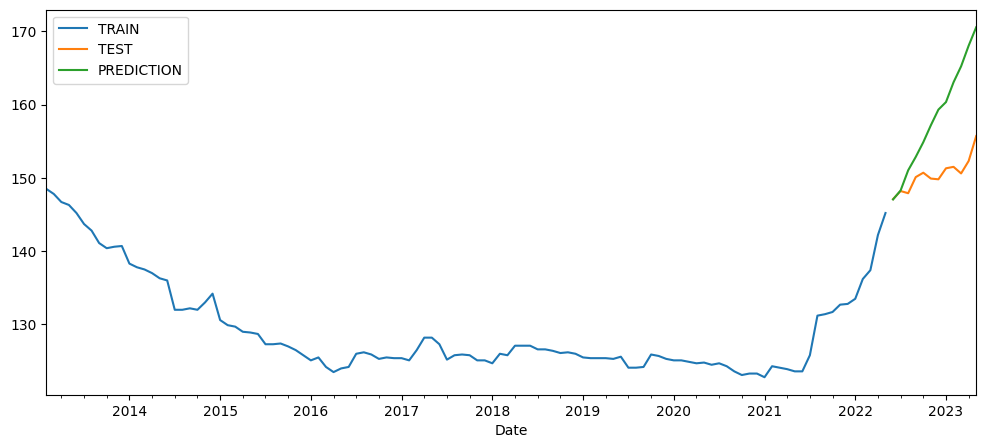

In [52]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,5))
test_predictions.plot(legend=True,label='PREDICTION');

In [53]:
final_model = ExponentialSmoothing(df_new['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [54]:
forecast_predictions = final_model.forecast(12)

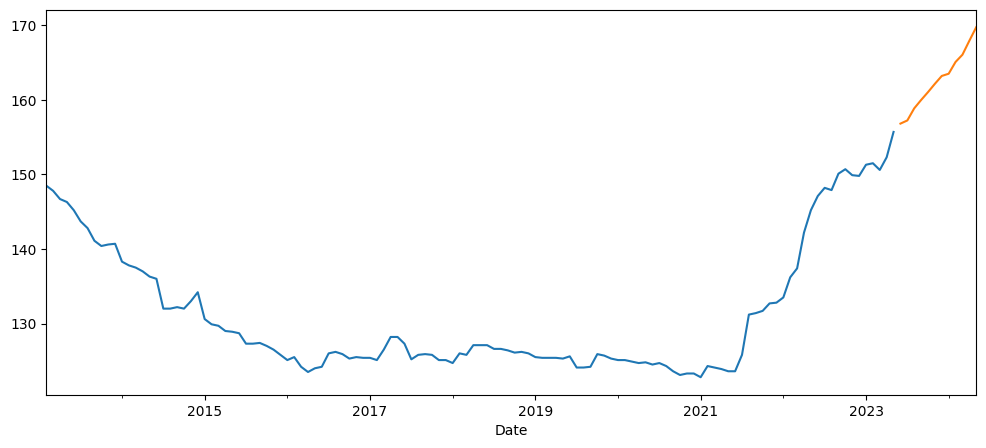

In [55]:
df_new['Price'].plot(figsize=(12,5))
forecast_predictions.plot();

### Evaluation Metrics

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
mean_absolute_error(test_data,test_predictions)

7.7258220639033395

In [58]:
mean_squared_error(test_data,test_predictions)

89.50696008362348

In [59]:
np.sqrt(mean_squared_error(test_data,test_predictions))

9.460811808910664

In [60]:
test_data.describe()

,Price
count,12.000000
mean,150.425000
std,2.266806
min,147.100000
25%,149.400000
50%,150.350000
75%,151.350000
max,155.700000


## AR(p)
### Autoregressive Model

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


In [61]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

In [62]:
from statsmodels.tsa.ar_model import AutoReg

In [63]:
df_new.head()

,Price
Date,
2013-02-01,148.5
2013-03-01,147.8
2013-04-01,146.7
2013-05-01,146.3
2013-06-01,145.2


In [64]:
# Set one year for testing
train = df_new.iloc[:112]
test = df_new.iloc[112:]

### Fit an AR(1) Model

In [65]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
model = AutoReg(train['Price'], lags=1)
AR1fit = model.fit()
print(f'Coefficients:\n{AR1fit.params}')

Coefficients:
const       3.963067
Price.L1    0.969095
dtype: float64


In [67]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [68]:
predictions1

2022-06-01    144.675681
2022-07-01    144.167566
2022-08-01    143.675154
2022-09-01    143.197961
2022-10-01    142.735515
2022-11-01    142.287360
2022-12-01    141.853056
2023-01-01    141.432174
2023-02-01    141.024299
2023-03-01    140.629030
2023-04-01    140.245976
2023-05-01    139.874761
Freq: MS, Name: AR(1) Predictions, dtype: float64

<Axes: xlabel='Date'>

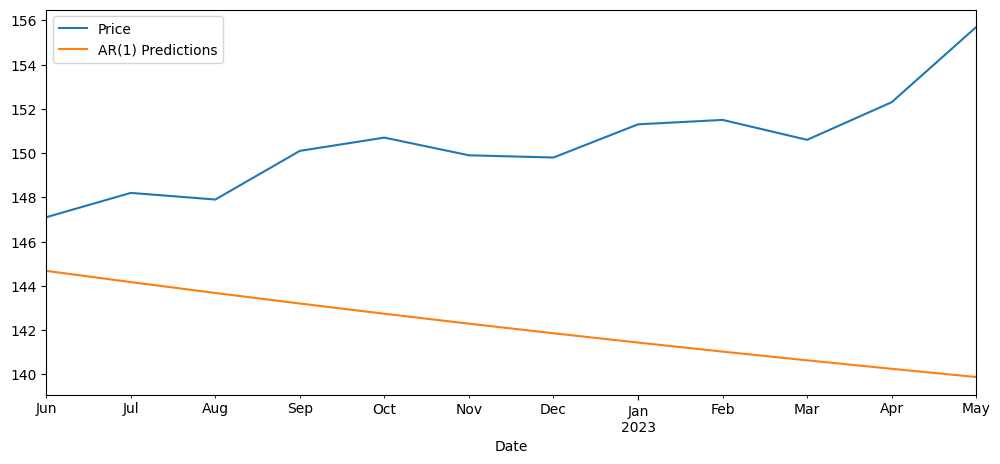

In [69]:
test.plot(figsize=(12,5), legend=True)
predictions1.plot(legend=True)

### Fit an AR(2) Model

In [70]:
model = AutoReg(train['Price'], lags=2)
AR2fit = model.fit()
print(f'Coefficients:\n{AR2fit.params}')

Coefficients:
const       3.648637
Price.L1    1.305732
Price.L2   -0.334046
dtype: float64


In [71]:
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

<Axes: xlabel='Date'>

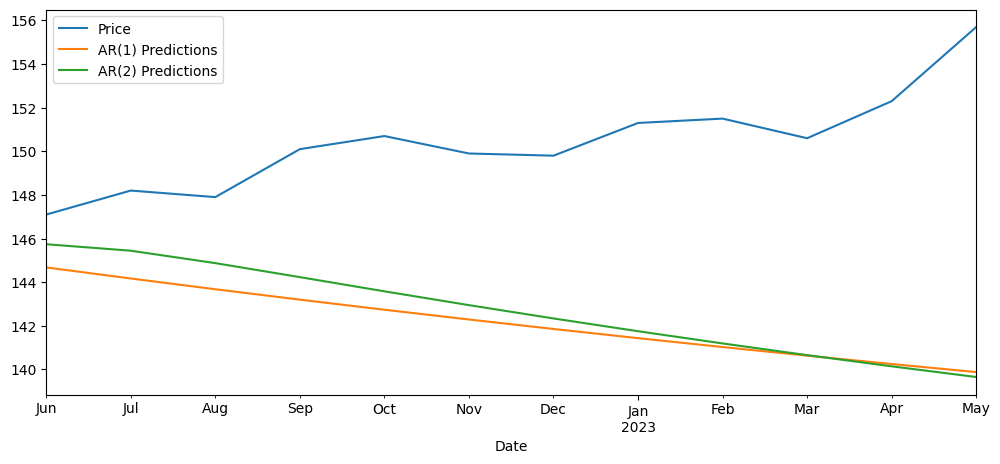

In [72]:
test.plot(figsize=(12,5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

### Fit an AR(p) model where statsmodels chooses p

In [73]:
# Define a range of lags to consider
lags_range = range(1, 10)

# Initialize variables for best AIC and best lag
best_aic = float("inf")
best_lag = None

# Iterate over the lags and fit AutoReg models
for lag in lags_range:
    model = AutoReg(train['Price'], lags=lag)
    fit = model.fit()
    
    # Check if the current model has lower AIC
    if fit.aic < best_aic:
        best_aic = fit.aic
        best_lag = lag

# Fit the AutoReg model with the best lag
best_model = AutoReg(train['Price'], lags=best_lag)
best_fit = best_model.fit()
print(f'Lag: {best_lag}')
print(f'Coefficients:\n{best_fit.params}')

Lag: 9
Coefficients:
const       0.365373
Price.L1    1.339778
Price.L2   -0.471465
Price.L3    0.204633
Price.L4   -0.062031
Price.L5   -0.017124
Price.L6    0.532366
Price.L7   -0.761980
Price.L8    0.600209
Price.L9   -0.366159
dtype: float64


In [74]:
model = AutoReg(train['Price'], lags=9)
AR9fit = model.fit()
print(f'Coefficients:\n{AR9fit.params}')

Coefficients:
const       0.365373
Price.L1    1.339778
Price.L2   -0.471465
Price.L3    0.204633
Price.L4   -0.062031
Price.L5   -0.017124
Price.L6    0.532366
Price.L7   -0.761980
Price.L8    0.600209
Price.L9   -0.366159
dtype: float64


In [75]:
predictions9 = AR9fit.predict(start=start, end=end, dynamic=False).rename('AR(9) Predictions')

<Axes: xlabel='Date'>

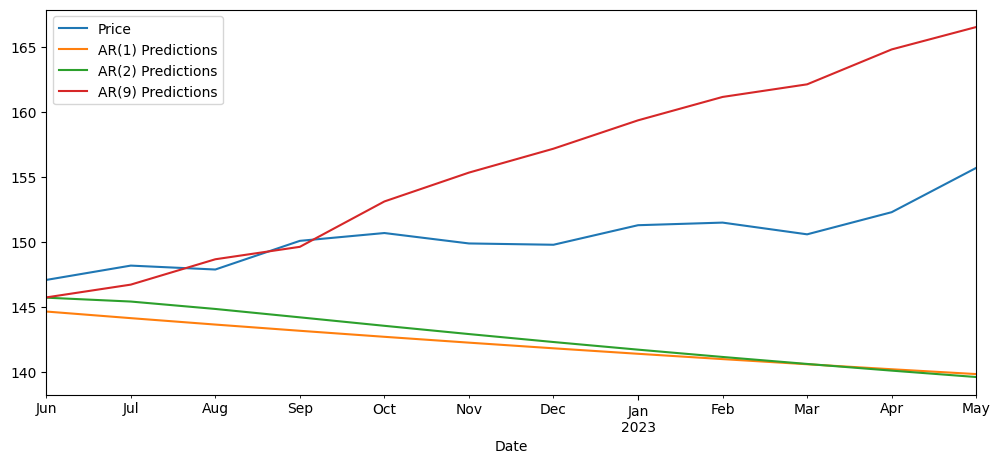

In [76]:
test.plot(figsize=(12,5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions9.plot(legend=True)

### Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn

In [77]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(9)']
preds = [predictions1, predictions2, predictions9]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['Price'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 81.20306537
AR(2) Error: 75.81825576
AR(9) Error: 54.81125137


In [78]:
np.sqrt(mean_squared_error(test['Price'],predictions9))

7.403462120423114

Another method is the Akaike information criterion (AIC), which does a better job of evaluating models by avoiding overfitting.
Fortunately this is available directly from the fit model object.

In [79]:
modls = [AR1fit,AR2fit,AR9fit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC:  358.4
AR(2) AIC: 345.66
AR(9) AIC: 304.27


### Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

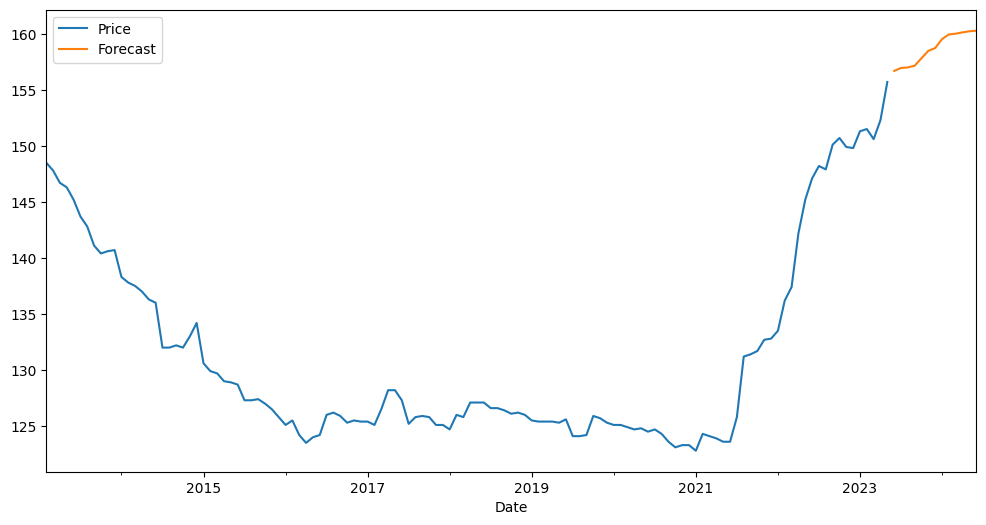

In [80]:
# First, retrain the model on the full dataset
model = AutoReg(df_new['Price'], lags=9)

# Next, fit the model
AR9fit = model.fit()

# Make predictions
fcast = AR9fit.predict(start=len(df_new), end=len(df_new)+12, dynamic=False).rename('Forecast')

# Plot the results
df_new['Price'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

## pmdarima Auto-ARIMA

In [81]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [82]:
auto_arima(df_new['Price'],seasonal=False)

ARIMA(order=(0, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [83]:
auto_arima(df_new['Price'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  124
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -186.733
Date:                Tue, 15 Aug 2023   AIC                            379.466
Time:                        10:25:16   BIC                            387.878
Sample:                    02-01-2013   HQIC                           382.883
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7345      0.076     -9.602      0.000      -0.884      -0.585
ma.L2         -0.1580      0.077     -2.059      0.040      -0.308      -0.008
sigma2         1.2351      0.099     12.525      0.000       1.042       1.428
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                81.97
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.53
Prob(H) (two-sided):                  0.16   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Run the augmented Dickey-Fuller Test on the original data

In [84]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [85]:
adf_test(df_new['Price'],'Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic       -0.500206
p-value                   0.891976
# lags used               8.000000
# observations          115.000000
critical value (1%)      -3.488535
critical value (5%)      -2.887020
critical value (10%)     -2.580360
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### Run the augmented Dickey-Fuller Test on the First and Second Difference

In [86]:
from statsmodels.tsa.statespace.tools import diff
df_new['d1'] = diff(df_new['Price'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df_new['d1'],'Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic       -1.901729
p-value                   0.331248
# lags used               7.000000
# observations          115.000000
critical value (1%)      -3.488535
critical value (5%)      -2.887020
critical value (10%)     -2.580360
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [87]:
from statsmodels.tsa.statespace.tools import diff
df_new['d2'] = diff(df_new['Price'],k_diff=2)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df_new['d2'],'Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic     -6.807572e+00
p-value                 2.157118e-09
# lags used             7.000000e+00
# observations          1.140000e+02
critical value (1%)    -3.489058e+00
critical value (5%)    -2.887246e+00
critical value (10%)   -2.580481e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Run the ACF and PACF plots
This confirms that we reached stationarity after the first difference.
A <strong>PACF Plot</strong> can reveal recommended AR(p) orders, and an <strong>ACF Plot</strong> can do the same for MA(q) orders.<br>

In [88]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

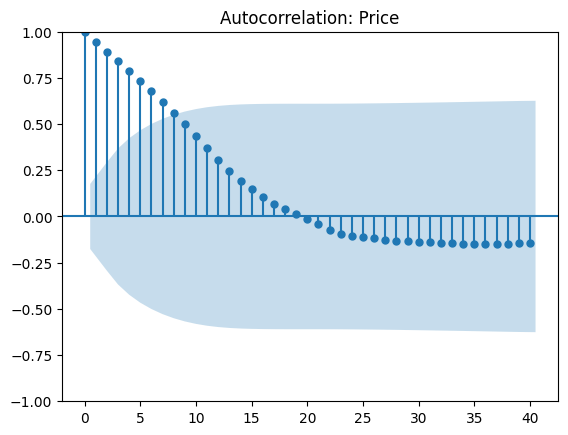

In [89]:
title = 'Autocorrelation: Price'
lags = 40
plot_acf(df_new['Price'],title=title,lags=lags);

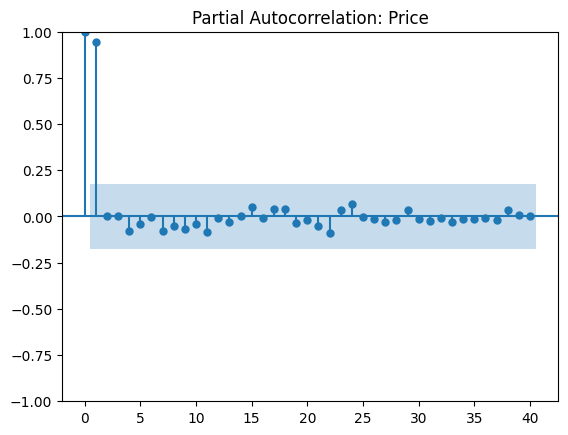

In [90]:
title = 'Partial Autocorrelation: Price'
lags = 40
plot_pacf(df_new['Price'],title=title,lags=lags);

This tells us that the AR component should be more important than MA. From the <a href='https://people.duke.edu/~rnau/411arim3.htm'>Duke University Statistical Forecasting site</a>:<br>
> <em>If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we    say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more    easily by adding AR terms than by adding MA terms.</em><br>

### ARIMA Model

In [91]:
# Set one year for testing
train = df_new.iloc[:112]
test = df_new.iloc[112:]

In [92]:
# Load specific forecasting tools

from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [93]:
model = ARIMA(train['Price'],order=(0,2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  112
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -165.591
Date:                Tue, 15 Aug 2023   AIC                            337.181
Time:                        10:25:51   BIC                            345.283
Sample:                    02-01-2013   HQIC                           340.467
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7613      0.078     -9.802      0.000      -0.914      -0.609
ma.L2         -0.0901      0.096     -0.940      0.347      -0.278       0.098
sigma2         1.1756      0.090     13.046      0.000       0.999       1.352
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               119.85
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.59
Prob(H) (two-sided):                  0.31   Kurtosis:                         7.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARIMA(0,2,2) Predictions')

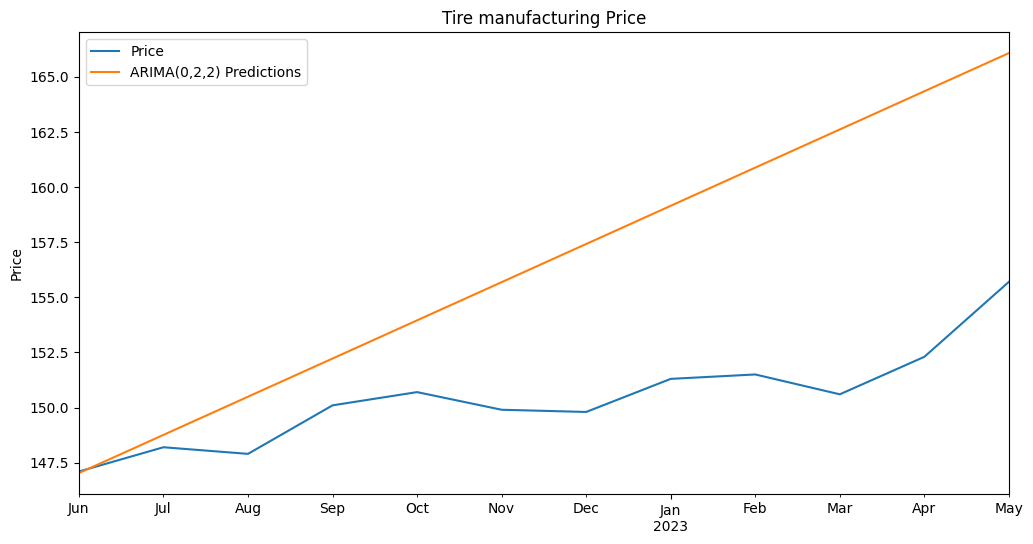

In [95]:
title = 'Tire manufacturing Price'
ylabel='Price'
xlabel='' # we don't really need a label here

ax = test['Price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [96]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,2,2) Predictions')

Passing dynamic=False means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing typ='levels' predicts the levels of the original endogenous variables. If we'd used the default typ='linear' we would have seen linear predictions in terms of the differenced endogenous variables.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [97]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Price'][i]}")

predicted=147.0291185, expected=147.1
predicted=148.7601081, expected=148.2
predicted=150.4910977, expected=147.9
predicted=152.2220873, expected=150.1
predicted=153.9530769, expected=150.7
predicted=155.6840665, expected=149.9
predicted=157.4150561, expected=149.8
predicted=159.1460457, expected=151.3
predicted=160.8770353, expected=151.5
predicted=162.6080249, expected=150.6
predicted=164.3390145, expected=152.3
predicted=166.0700041, expected=155.7


In [98]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

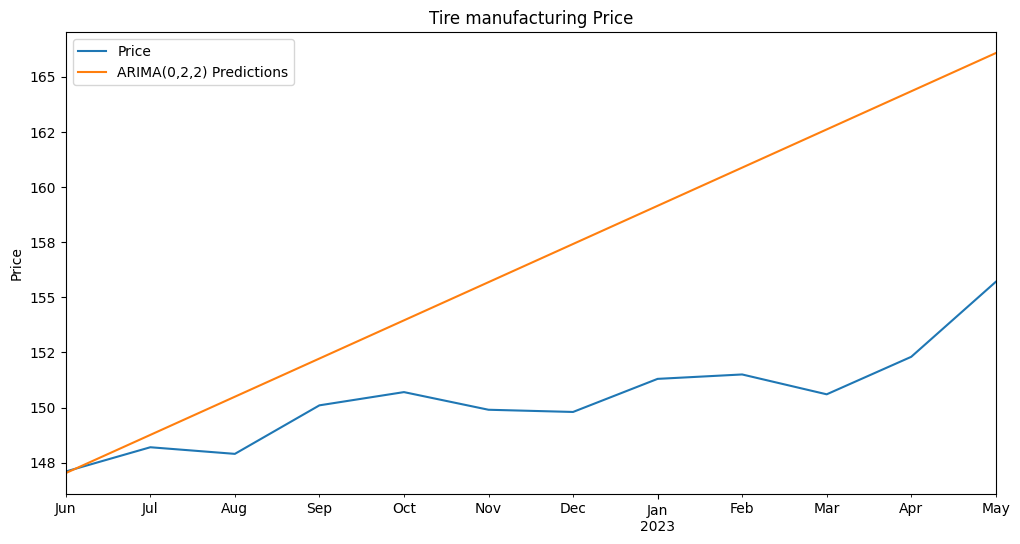

In [99]:
# Plot predictions against known values
title = 'Tire manufacturing Price'
ylabel='Price'
xlabel='' # we don't really need a label here

ax = test['Price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### Evaluate the Model

In [100]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Price'], predictions)
print(f'ARIMA(0,2,2) MSE Error: {error:11.10}')

ARIMA(0,2,2) MSE Error: 54.97662822


In [101]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Price'], predictions)
print(f'ARIMA(0,2,2) RMSE Error: {error:11.10}')

ARIMA(0,2,2) RMSE Error: 7.414622595


In [102]:
df_new['Price'].mean()

131.37983870967741

In [103]:
predictions.mean()

156.54956126816285

### Retrain the model on the full data, and forecast the future

In [104]:
model = ARIMA(df_new['Price'],order=(0,2,2))
results = model.fit()
fcast = results.predict(len(df_new),len(df_new)+11,typ='levels').rename('ARIMA(0,2,2) Forecast')

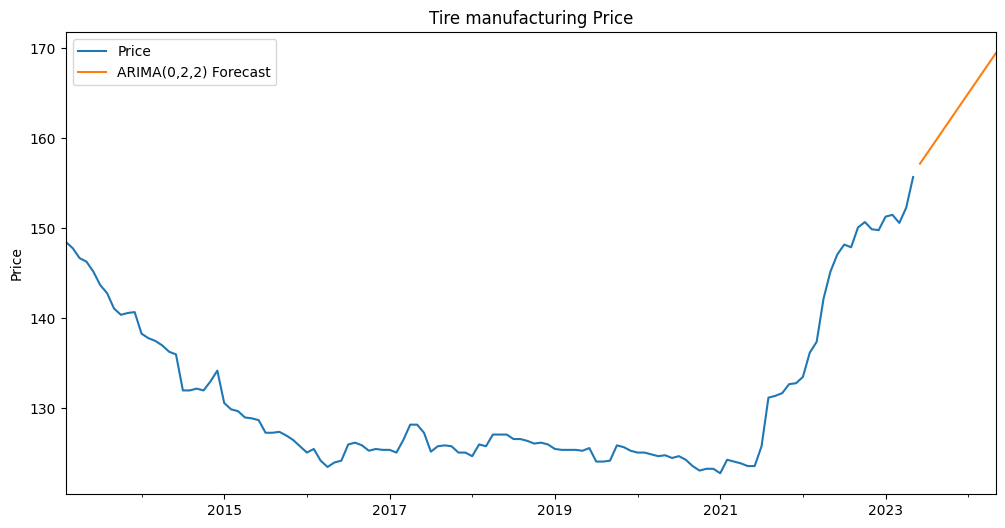

In [105]:
# Plot predictions against known values
title = 'Tire manufacturing Price'
ylabel='Price'
xlabel='' # we don't really need a label here

ax = df_new['Price'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [107]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df_new['Price'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  124
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -186.733
Date:                Tue, 15 Aug 2023   AIC                            379.466
Time:                        10:26:12   BIC                            387.878
Sample:                    02-01-2013   HQIC                           382.883
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7345      0.076     -9.602      0.000      -0.884      -0.585
ma.L2         -0.1580      0.077     -2.059      0.040      -0.308      -0.008
sigma2         1.2351      0.099     12.525      0.000       1.042       1.428
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                81.97
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.53
Prob(H) (two-sided):                  0.16   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""